#<font face="Trebuchet MS" size="5">PIDM Demo<font color="#999" size="4">&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;</font><font color="#872" size="4">Person Image Synthesis via Denoising Diffusion Model (CVPR'23)</font><font color="#999" size="4">&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;</font><a href="https://github.com/ankanbhunia/PIDM" target="_blank"><font color="#F00" size="4">Github</font></a><font color="#999" size="4">&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;</font><a href="https://arxiv.org/abs/2211.12500" target="_blank"><font color="#F00" size="4">ArXiv</font></a>




<a href="https://raw.githubusercontent.com/ankanbhunia/PIDM/main/Figures/intro1.png" target="_blank">
    <img src="https://raw.githubusercontent.com/ankanbhunia/PIDM/main/Figures/intro1.png"></a>
    <p align="left" "font-size:5px;">
Our model generalizes well to in-the-wild cases. The source style image (left-most, only ONE) in the above example is taken from an online e-commerce fashion site (<a href="https://www.myntra.com/dresses/antheaa/antheaa-women-gorgeous-red-floral-cinched-waist-dress/15797616/buy">https://www.myntra.com/dresses/antheaa/antheaa-women-gorgeous-red-floral-cinched-waist-dress/15797616/</a> or <a href="https://www.etsy.com/in-en/listing/1321526690/women-gorgeous-red-floral-cinched-waist?gpla=1&gao=1&">https://www.etsy.com/in-en/listing/1321526690/women-gorgeous-red-floral-cinched-waist?gpla=1&gao=1&</a>). PIDM successfully generates multiple pose representation of the given source image.
</p>



This colab notebook provides a quick example of pose control and apperance control with our pretrained models.

In [1]:
#@title Try it yourself ---> Install Libraries & Pretrained models
print ("Installing Libraries...")
import os; os.system('pip install --upgrade --no-cache-dir gdown tensorfn')
os.system('pip install --upgrade --no-cache-dir pydantic==1.10.14')
print ("---> Successfully Installed.")
print ("Downloading PIDM models...")
os.system('git clone https://github.com/ankanbhunia/PIDM')
os.system('gdown 1WkV5Pn-_fBdiZlvVHHx_S97YESBkx4lD && mkdir PIDM/checkpoints && mv last.pt PIDM/checkpoints/last.pt')
print ("---> Successfully Downloaded.")

Installing Libraries...
---> Successfully Installed.
---> Successfully Downloaded.


In [4]:
# 修补 torch.load 函数以解决序列化错误
import torch
import sys
from importlib import reload

# 保存原始的 torch.load 函数
original_torch_load = torch.load

# 创建一个新的函数，默认使用 weights_only=False
def patched_torch_load(*args, **kwargs):
    if 'weights_only' not in kwargs:
        kwargs['weights_only'] = False
    return original_torch_load(*args, **kwargs)

# 替换 torch.load 函数
torch.load = patched_torch_load

# 如果已经导入了 predict 模块，重新加载它
if 'predict' in sys.modules:
    reload(sys.modules['predict'])

In [8]:
#@title Pose Control using PIDM
%cd "/content/PIDM"
from predict import Predictor
from IPython.display import Image
from google.colab import files
obj = Predictor()

### upload a source file
Path = list(files.upload().keys())[0] # Please check "/content/PIDM/data/" for sample images for source file.
### OR enter the path
#Path = "data/deepfashion_256x256/target_edits/reference_img_5.png"

obj.predict_pose(image=Path, sample_algorithm='ddim', num_poses=4, nsteps=50)

Image('output.png')

/content/PIDM


OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 2.12 MiB is free. Process 6952 has 14.74 GiB memory in use. Of the allocated memory 14.59 GiB is allocated by PyTorch, and 21.50 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

/content/pidm-demo
Upload a source image:


Saving 2a7eba03-9757-4998-871c-56edc9e22bbb1636990940188TokyoTalkiesBlackFloralCrepeA-LineDress1.jpg to 2a7eba03-9757-4998-871c-56edc9e22bbb1636990940188TokyoTalkiesBlackFloralCrepeA-LineDress1 (2).jpg


50it [00:15,  3.19it/s]


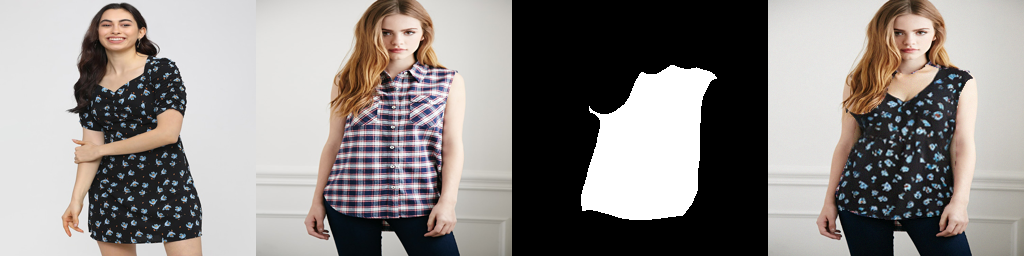

In [ ]:
#@title Appearance Control using PIDM
%cd "/content/PIDM"
from predict import Predictor
from IPython.display import Image
from google.colab import files
obj = Predictor()

### upload a source file
print ("Upload a source image:")
src = list(files.upload().keys())[0] # Please check "/content/PIDM/data/" for sample images for source file.
### OR enter the path
#src = "data/deepfashion_256x256/target_edits/reference_img_5.png"

ref_img = "data/deepfashion_256x256/target_edits/reference_img_1.png"
ref_mask = "data/deepfashion_256x256/target_mask/upper/reference_mask_1.png"
ref_pose = "data/deepfashion_256x256/target_pose/reference_pose_1.npy"

obj.predict_appearance(image=src, ref_img = ref_img, ref_mask = ref_mask, ref_pose = ref_pose, sample_algorithm = 'ddim',  nsteps = 50)

Image('output.png')